<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/04.%20Week%204/Notebook/02.Instance%26RulesbasedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Fungsi buat plot boundary keputusan
def plot_decision_boundary(model, X, y, ax, title, resolution=0.02, alpha=0.3):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=alpha, cmap=plt.cm.viridis)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis)
    ax.set_title(title)

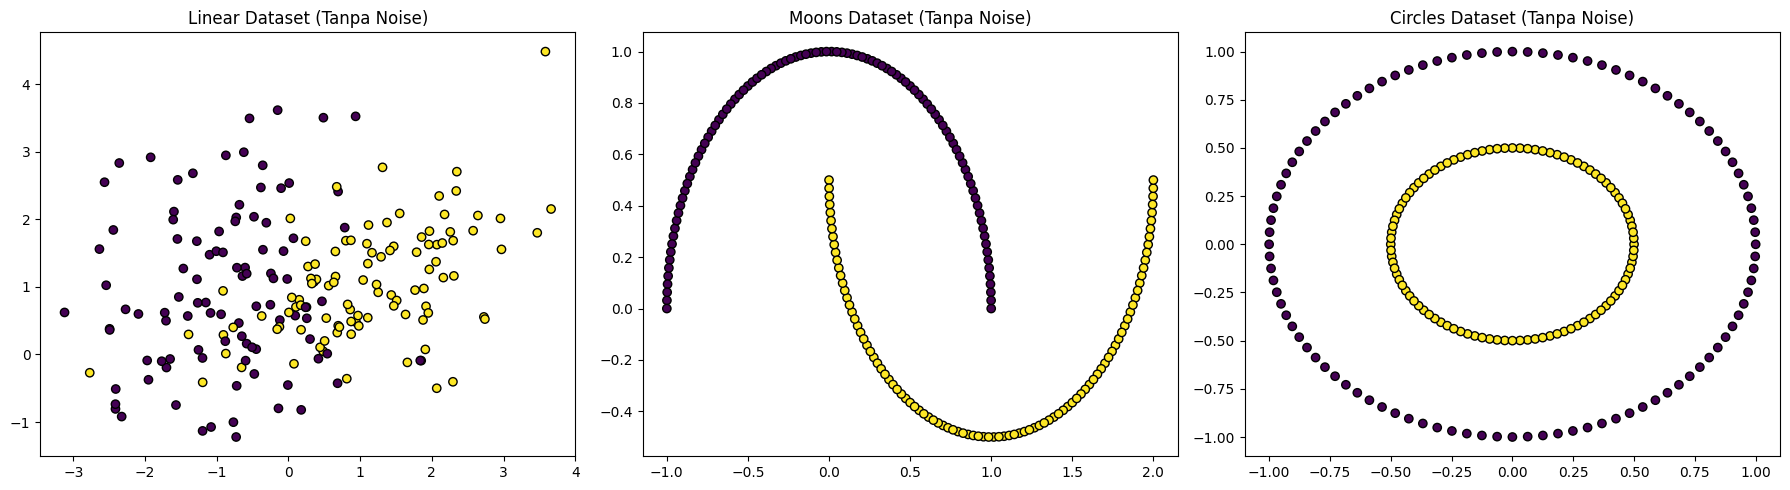

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles

# Bikin dataset TANPA noise
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                         n_clusters_per_class=1, random_state=42)
X_moons, y_moons = make_moons(n_samples=200, noise=0, random_state=42)
X_circles, y_circles = make_circles(n_samples=200, noise=0, factor=0.5, random_state=42)

# Plot scatter tiap dataset (tanpa model)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, edgecolors='k', cmap='viridis')
axes[0].set_title("Linear Dataset (Tanpa Noise)")

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, edgecolors='k', cmap='viridis')
axes[1].set_title("Moons Dataset (Tanpa Noise)")

axes[2].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, edgecolors='k', cmap='viridis')
axes[2].set_title("Circles Dataset (Tanpa Noise)")

plt.tight_layout()
plt.show()

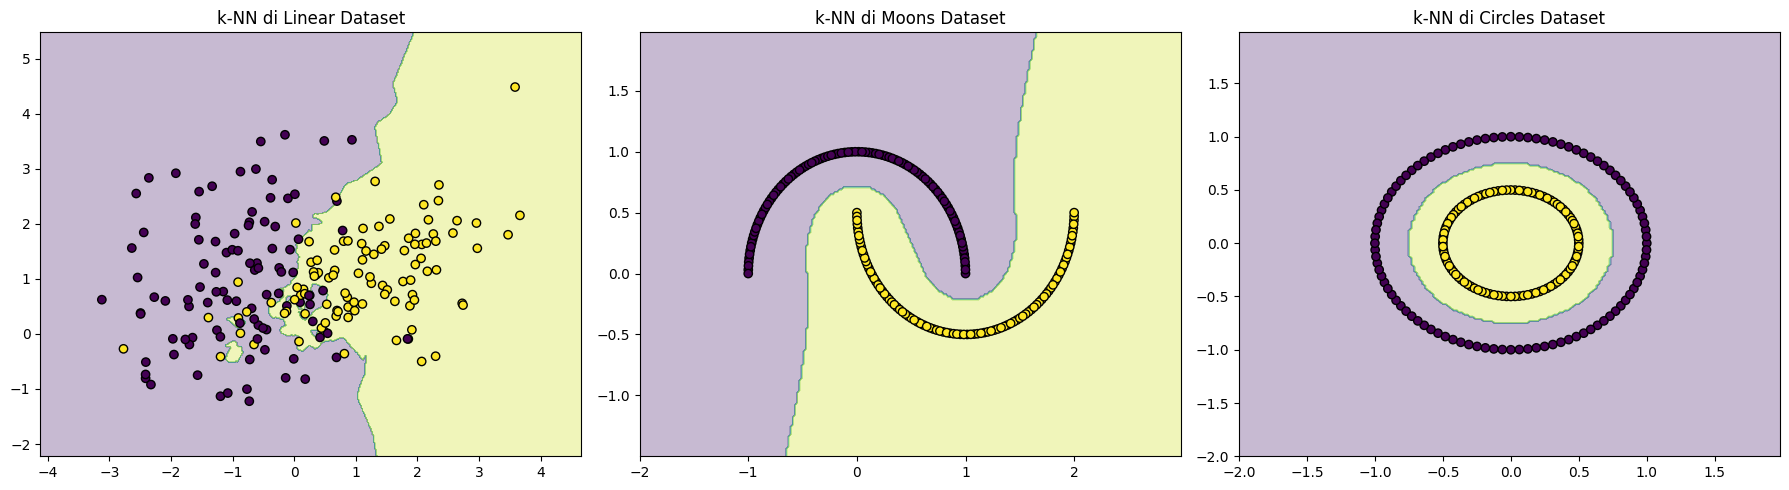

In [ ]:
# Bikin model k-NN untuk tiap dataset (k=5)
knn_linear = KNeighborsClassifier(n_neighbors=5)
knn_linear.fit(X_linear, y_linear)

knn_moons = KNeighborsClassifier(n_neighbors=5)
knn_moons.fit(X_moons, y_moons)

knn_circles = KNeighborsClassifier(n_neighbors=5)
knn_circles.fit(X_circles, y_circles)

# Plot decision boundary buat ketiga dataset secara menyamping
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(knn_linear, X_linear, y_linear, axes[0], "k-NN di Linear Dataset")
plot_decision_boundary(knn_moons, X_moons, y_moons, axes[1], "k-NN di Moons Dataset")
plot_decision_boundary(knn_circles, X_circles, y_circles, axes[2], "k-NN di Circles Dataset")

plt.tight_layout()
plt.show()

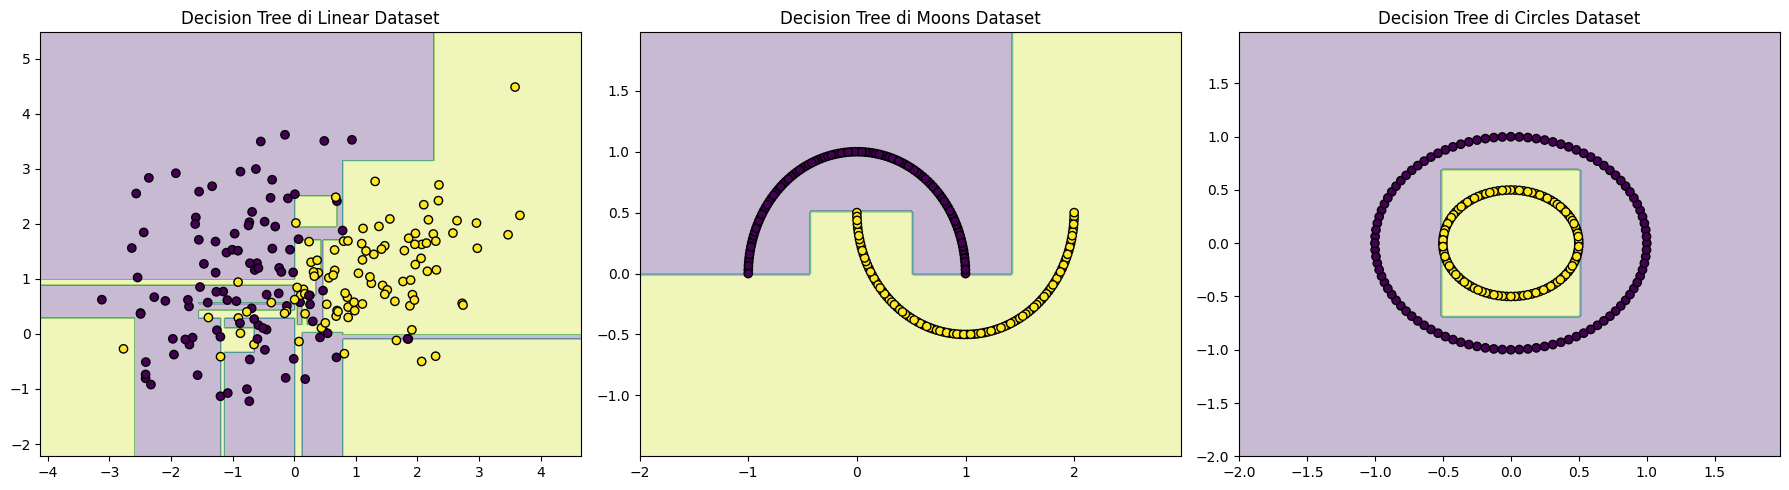

In [ ]:
# Bikin model Decision Tree buat tiap dataset
dt_linear = DecisionTreeClassifier(random_state=42)
dt_linear.fit(X_linear, y_linear)

dt_moons = DecisionTreeClassifier(random_state=42)
dt_moons.fit(X_moons, y_moons)

dt_circles = DecisionTreeClassifier(random_state=42)
dt_circles.fit(X_circles, y_circles)

# Plot decision boundary buat ketiga dataset secara menyamping
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(dt_linear, X_linear, y_linear, axes[0], "Decision Tree di Linear Dataset")
plot_decision_boundary(dt_moons, X_moons, y_moons, axes[1], "Decision Tree di Moons Dataset")
plot_decision_boundary(dt_circles, X_circles, y_circles, axes[2], "Decision Tree di Circles Dataset")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Linear Dataset
y_pred_linear_knn = knn_linear.predict(X_linear)
acc_linear_knn = accuracy_score(y_linear, y_pred_linear_knn)

y_pred_linear_dt = dt_linear.predict(X_linear)
acc_linear_dt = accuracy_score(y_linear, y_pred_linear_dt)

# Moons Dataset
y_pred_moons_knn = knn_moons.predict(X_moons)
acc_moons_knn = accuracy_score(y_moons, y_pred_moons_knn)

y_pred_moons_dt = dt_moons.predict(X_moons)
acc_moons_dt = accuracy_score(y_moons, y_pred_moons_dt)

# Circles Dataset
y_pred_circles_knn = knn_circles.predict(X_circles)
acc_circles_knn = accuracy_score(y_circles, y_pred_circles_knn)

y_pred_circles_dt = dt_circles.predict(X_circles)
acc_circles_dt = accuracy_score(y_circles, y_pred_circles_dt)

print("==== Evaluation Accuracy ====")

print("\n-- Linear Dataset --")
print("k-NN Accuracy:", acc_linear_knn)
print("DT Accuracy:", acc_linear_dt)

print("\n-- Moons Dataset --")
print("k-NN Accuracy:", acc_moons_knn)
print("DT Accuracy:", acc_moons_dt)

print("\n-- Circles Dataset --")
print("k-NN Accuracy:", acc_circles_knn)
print("DT Accuracy:", acc_circles_dt)

==== Evaluation Accuracy ====

-- Linear Dataset --
k-NN Accuracy: 0.875
DT Accuracy: 1.0

-- Moons Dataset --
k-NN Accuracy: 1.0
DT Accuracy: 1.0

-- Circles Dataset --
k-NN Accuracy: 1.0
DT Accuracy: 1.0


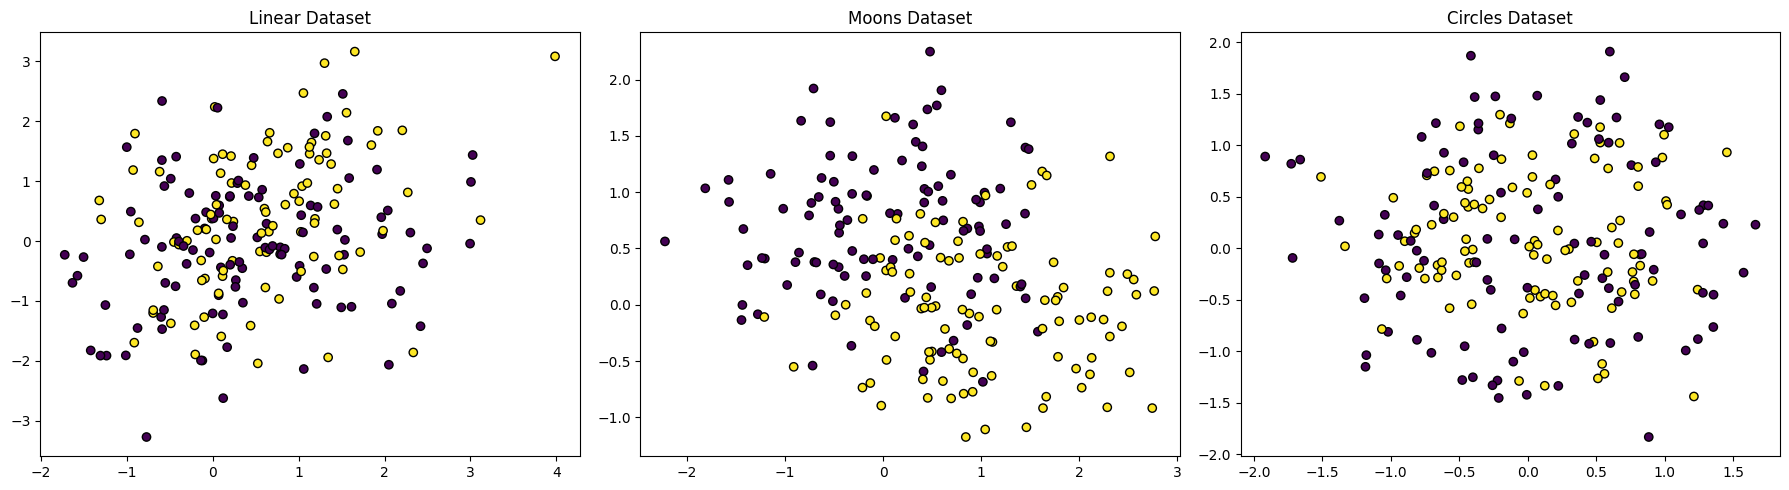

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles

# Bikin dataset
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                         n_clusters_per_class=1, flip_y=0.4, class_sep=0.5,
                                         random_state=42)
X_moons, y_moons = make_moons(n_samples=200, noise=0.5, random_state=42)
X_circles, y_circles = make_circles(n_samples=200, noise=0.5, factor=0.5, random_state=42)

# Plot scatter tiap dataset (tanpa model)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, edgecolors='k', cmap='viridis')
axes[0].set_title("Linear Dataset")

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, edgecolors='k', cmap='viridis')
axes[1].set_title("Moons Dataset")

axes[2].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, edgecolors='k', cmap='viridis')
axes[2].set_title("Circles Dataset")

plt.tight_layout()
plt.show()

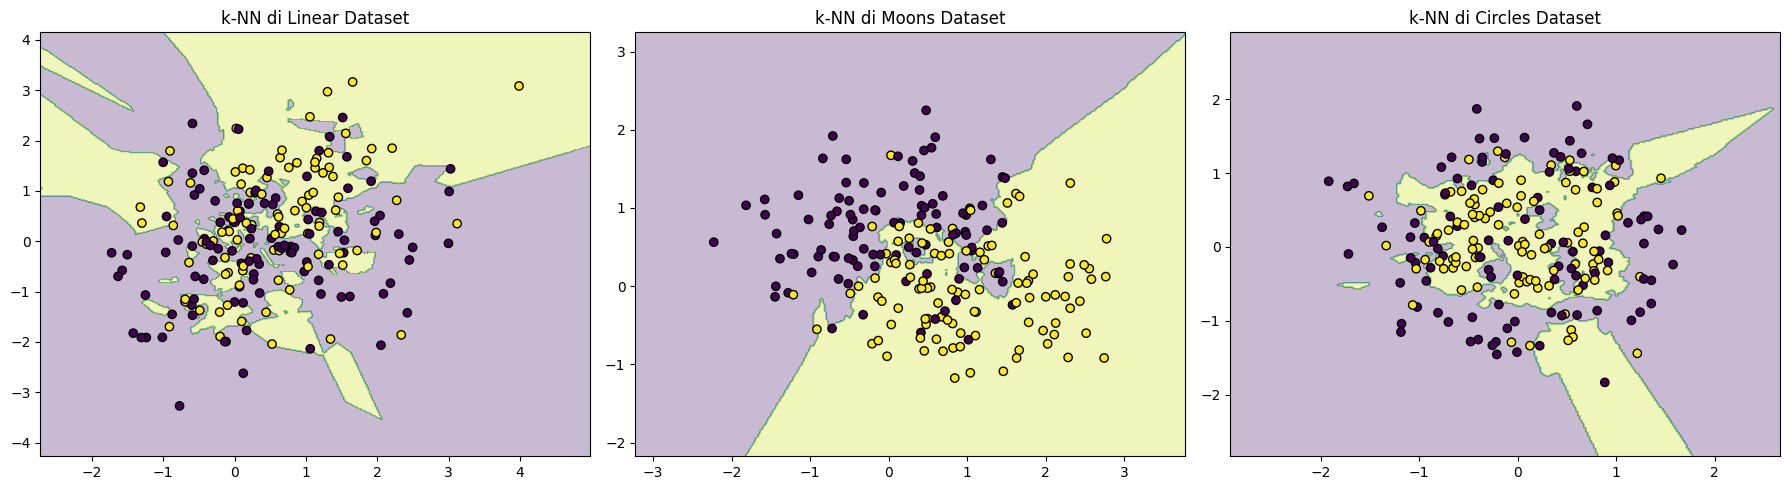

In [ ]:
# Bikin model k-NN untuk tiap dataset (k=5)
knn_linear = KNeighborsClassifier(n_neighbors=5)
knn_linear.fit(X_linear, y_linear)

knn_moons = KNeighborsClassifier(n_neighbors=5)
knn_moons.fit(X_moons, y_moons)

knn_circles = KNeighborsClassifier(n_neighbors=5)
knn_circles.fit(X_circles, y_circles)

# Plot decision boundary buat ketiga dataset secara menyamping
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(knn_linear, X_linear, y_linear, axes[0], "k-NN di Linear Dataset")
plot_decision_boundary(knn_moons, X_moons, y_moons, axes[1], "k-NN di Moons Dataset")
plot_decision_boundary(knn_circles, X_circles, y_circles, axes[2], "k-NN di Circles Dataset")

plt.tight_layout()
plt.show()

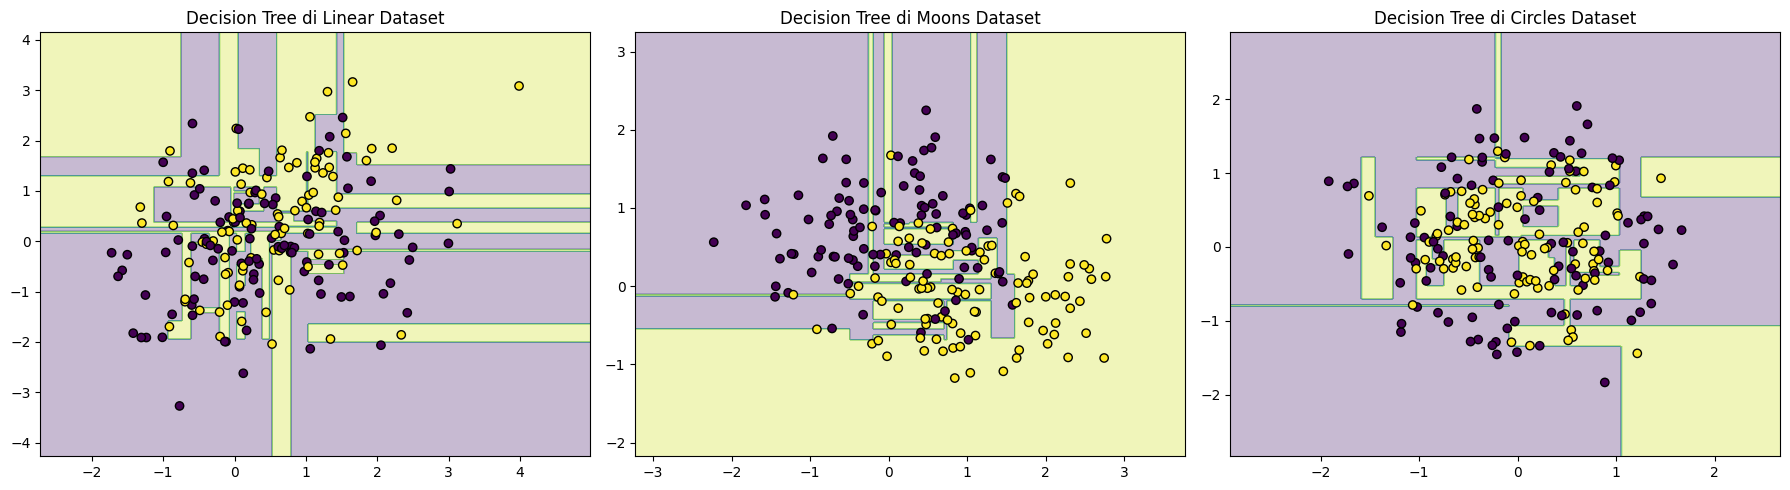

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Bikin model Decision Tree buat tiap dataset
dt_linear = DecisionTreeClassifier(random_state=42)
dt_linear.fit(X_linear, y_linear)

dt_moons = DecisionTreeClassifier(random_state=42)
dt_moons.fit(X_moons, y_moons)

dt_circles = DecisionTreeClassifier(random_state=42)
dt_circles.fit(X_circles, y_circles)

# Plot decision boundary buat ketiga dataset secara menyamping
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(dt_linear, X_linear, y_linear, axes[0], "Decision Tree di Linear Dataset")
plot_decision_boundary(dt_moons, X_moons, y_moons, axes[1], "Decision Tree di Moons Dataset")
plot_decision_boundary(dt_circles, X_circles, y_circles, axes[2], "Decision Tree di Circles Dataset")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Linear Dataset
y_pred_linear_knn = knn_linear.predict(X_linear)
acc_linear_knn = accuracy_score(y_linear, y_pred_linear_knn)

y_pred_linear_dt = dt_linear.predict(X_linear)
acc_linear_dt = accuracy_score(y_linear, y_pred_linear_dt)

# Moons Dataset
y_pred_moons_knn = knn_moons.predict(X_moons)
acc_moons_knn = accuracy_score(y_moons, y_pred_moons_knn)

y_pred_moons_dt = dt_moons.predict(X_moons)
acc_moons_dt = accuracy_score(y_moons, y_pred_moons_dt)

# Circles Dataset
y_pred_circles_knn = knn_circles.predict(X_circles)
acc_circles_knn = accuracy_score(y_circles, y_pred_circles_knn)

y_pred_circles_dt = dt_circles.predict(X_circles)
acc_circles_dt = accuracy_score(y_circles, y_pred_circles_dt)

print("==== Evaluation Accuracy ====")

print("\n-- Linear Dataset --")
print("k-NN Accuracy:", acc_linear_knn)
print("DT Accuracy:", acc_linear_dt)

print("\n-- Moons Dataset --")
print("k-NN Accuracy:", acc_moons_knn)
print("DT Accuracy:", acc_moons_dt)

print("\n-- Circles Dataset --")
print("k-NN Accuracy:", acc_circles_knn)
print("DT Accuracy:", acc_circles_dt)

==== Evaluation Accuracy ====

-- Linear Dataset --
k-NN Accuracy: 0.695
DT Accuracy: 1.0

-- Moons Dataset --
k-NN Accuracy: 0.86
DT Accuracy: 1.0

-- Circles Dataset --
k-NN Accuracy: 0.735
DT Accuracy: 1.0


In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary", resolution=0.02, alpha=0.4, mesh=True):
    """
    Visualisasi decision boundary untuk model klasifikasi 2D.

    Parameters:
    - model: Model ML yang sudah di-trained (k-NN, Decision Tree, dll.)
    - X: Data fitur (array 2D)
    - y: Target/label (array 1D)
    - title: Judul plot
    - resolution: Resolusi grid (semakin kecil, semakin halus)
    - alpha: Transparansi area decision boundary
    - mesh: Tampilkan grid mesh (True/False)
    """

    # Membuat grid untuk decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # Prediksi setiap titik di grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary dan data points
    plt.figure(figsize=(10, 6))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=alpha)
    plt.contourf(xx, yy, Z, alpha=alpha, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title, fontsize=14)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

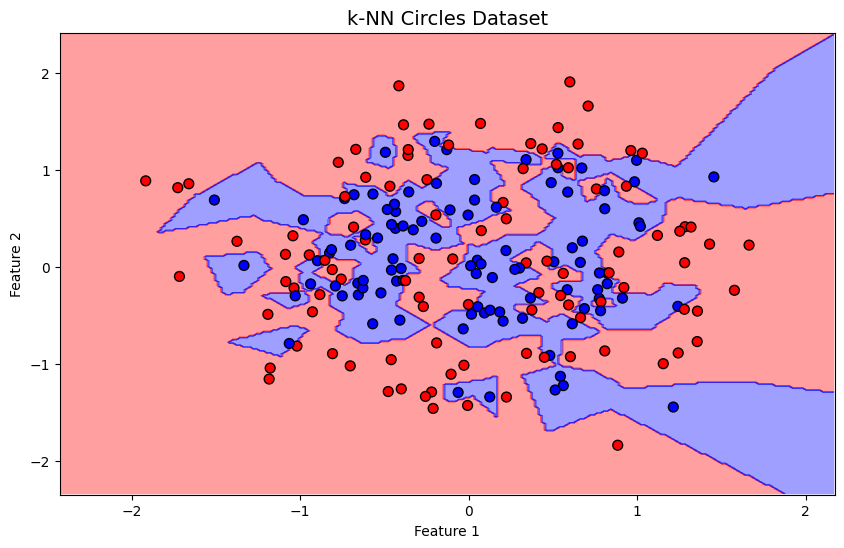

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_circles, y_circles)

plot_decision_boundary(knn, X_circles, y_circles,
                      title="k-NN Circles Dataset",
                      resolution=0.02, alpha=0.3)

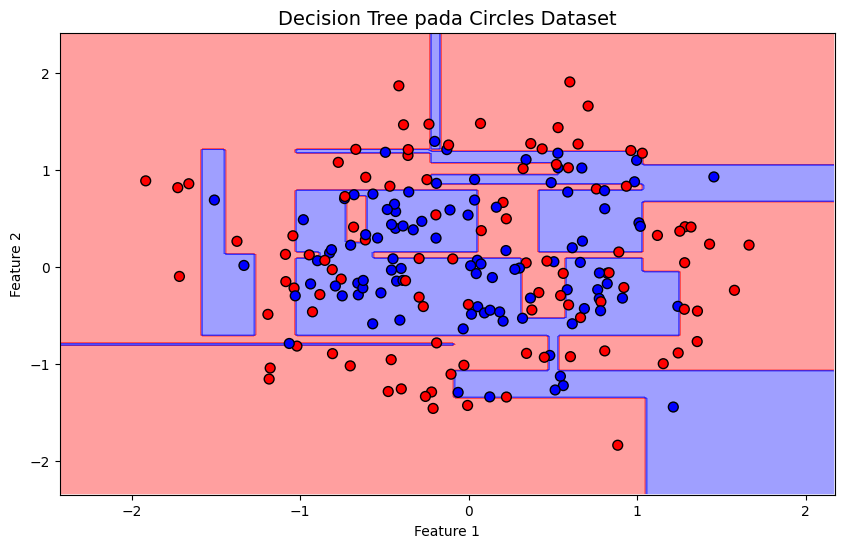

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_circles, y_circles)

# Plot decision boundary
plot_decision_boundary(dt, X_circles, y_circles,
                      title="Decision Tree pada Circles Dataset",
                      resolution=0.02, alpha=0.3)

## Analytical Question
1. **Perbandingan Pendekatan Instance-Based dan Rules-Based**
Jelaskan secara komprehensif perbedaan fundamental antara pendekatan pembelajaran instance-based (misalnya, K-Nearest Neighbors) dan rules-based (misalnya, Decision Tree). Dalam jawaban, identifikasikan prinsip dasar, kelebihan dan kekurangan masing-masing metode, serta situasi dunia nyata yang mendukung penerapan salah satu metode dibandingkan dengan yang lain.

2. **Analisis Model Parametrik versus Non-Parametrik**
Uraikan perbedaan utama antara model parametrik (misalnya, Linear Regression) dan model non-parametrik (misalnya, K-Nearest Neighbors atau Decision Tree). Diskusikan keuntungan dan keterbatasan masing-masing pendekatan, terutama terkait dengan ukuran dataset, risiko overfitting, serta kompleksitas komputasional. Berikan contoh aplikasi nyata di mana salah satu pendekatan lebih tepat digunakan.

3. **Analisis Batas Keputusan dan Kemampuan Generalisasi**
Banyak ditemukan bahwa model instance-based menghasilkan batas keputusan yang lebih halus, sedangkan model rules-based cenderung menunjukkan pola grid atau kotak-kotak. Jelaskan secara mendalam alasan terjadinya perbedaan tersebut dan analisis implikasinya terhadap kemampuan generalisasi model pada data baru, terutama dalam menghadapi outlier dan noise.

4. **Integrasi Model Parametrik dan Non-Parametrik dalam Kerangka Hibrida**
Pertimbangkan kemungkinan integrasi antara model parametrik dan non-parametrik dalam suatu sistem machine learning yang robust. Uraikan pendekatan yang dapat diterapkan untuk menggabungkan kedua jenis model tersebut, serta diskusikan keuntungan dan potensi kendala dari implementasi model hibrida dalam menangani data dengan karakteristik kompleks.

5. **Analisis Interpretabilitas dan Skalabilitas dalam Model Instance-Based dan Rules-Based**
Evaluasilah perbedaan antara model instance-based dan rules-based dari segi interpretabilitas dan efisiensi komputasi. Diskusikan bagaimana masing-masing pendekatan mempengaruhi pemahaman atas hasil prediksi serta penerapannya pada dataset berskala besar.

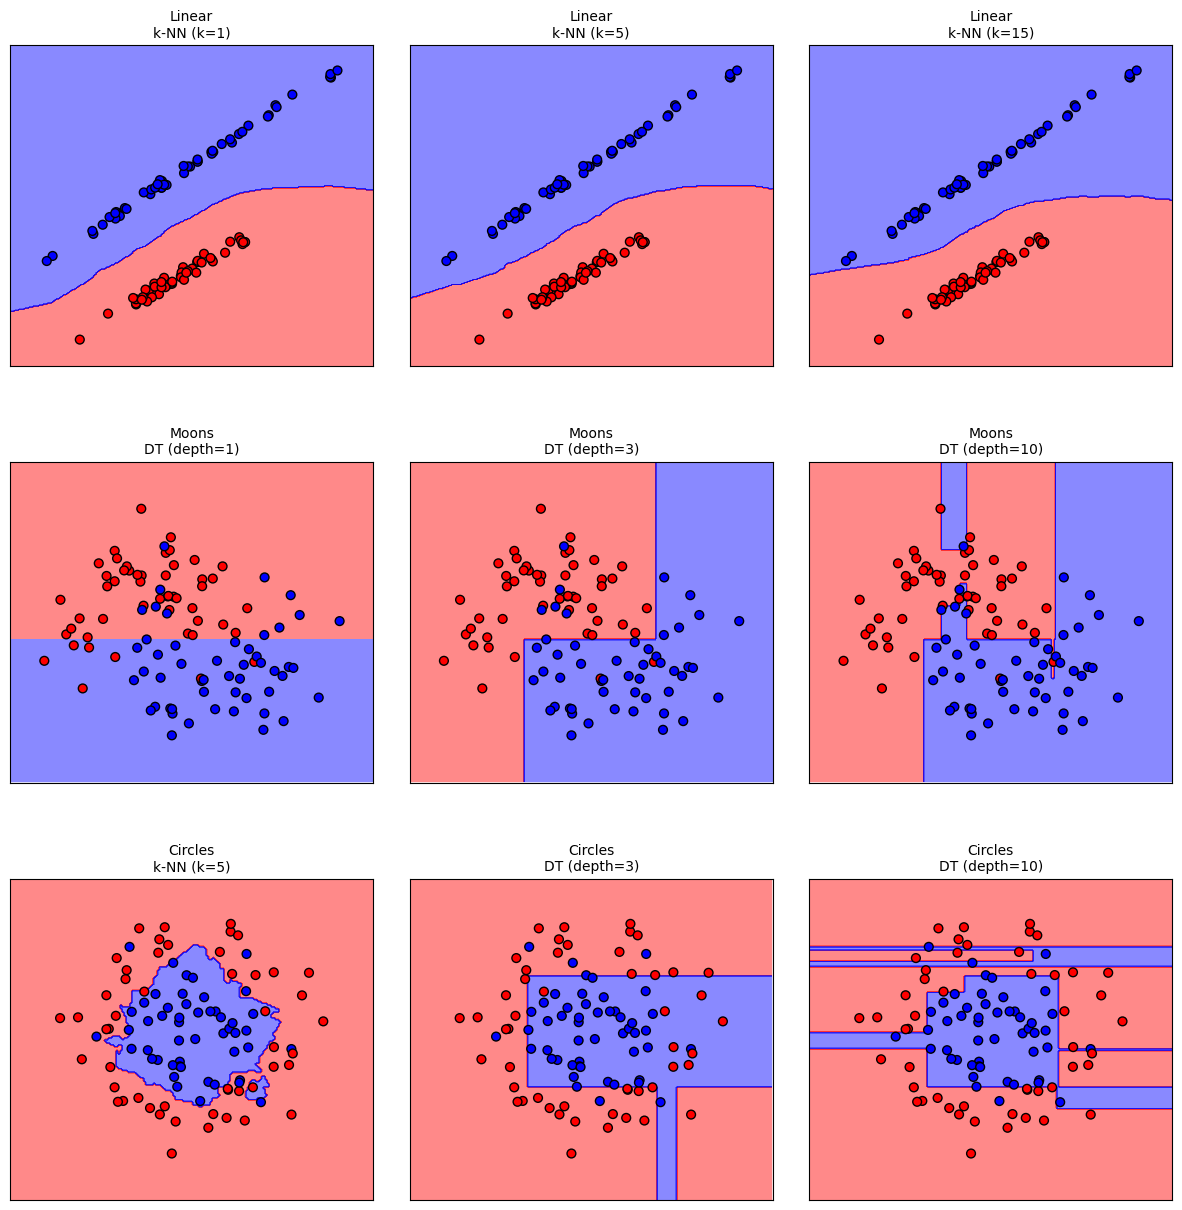

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Generate 3 dataset dengan tingkat kesulitan berbeda
datasets = [
    make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42),  # Linear
    make_moons(noise=0.3, random_state=42),  # Moons
    make_circles(noise=0.2, factor=0.5, random_state=42)  # Circles
]

# Fungsi plot_decision_boundary yang bisa plot di subplot
def plot_decision_boundary(ax, model, X, y, title, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.3)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40, cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_title(title, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# Membuat grid 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Loop untuk setiap dataset dan parameter
for row_idx, (X, y) in enumerate(datasets):
    # Baris 1: k-NN dengan k=1, 5, 15
    knn1 = KNeighborsClassifier(n_neighbors=1).fit(X, y)
    knn5 = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    knn15 = KNeighborsClassifier(n_neighbors=15).fit(X, y)

    # Baris 2: Decision Tree dengan depth=1, 3, 10
    dt1 = DecisionTreeClassifier(max_depth=1, random_state=42).fit(X, y)
    dt3 = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X, y)
    dt10 = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X, y)

    # Baris 3: Kombinasi model-parameter khusus
    models = [
        (knn1, "k-NN (k=1)"), (knn5, "k-NN (k=5)"), (knn15, "k-NN (k=15)"),
        (dt1, "DT (depth=1)"), (dt3, "DT (depth=3)"), (dt10, "DT (depth=10)"),
        (knn5, "k-NN (k=5)"), (dt3, "DT (depth=3)"), (dt10, "DT (depth=10)")
    ]

    # Plot ke dalam grid
    for col_idx in range(3):
        model, title = models[row_idx * 3 + col_idx]
        dataset_name = ["Linear", "Moons", "Circles"][row_idx]
        plot_decision_boundary(axes[row_idx, col_idx], model, X, y,
                             f"{dataset_name}\n{title}")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from matplotlib.colors import ListedColormap

# Generate dataset dengan 50 fitur (5 informatif, 45 noise)
X, y = make_classification(
    n_samples=1000,
    n_features=50,
    n_informative=5,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def plot_2d_decision_boundary(ax, model, X, y, feature_indices, title):
    """
    Plot decision boundary di 2 fitur yang dipilih.
    - model: Model yang sudah di-fit (harus memiliki atribut .n_features_in_)
    - feature_indices: Indeks 2 fitur (harus < model.n_features_in_)
    """
    # Validasi feature_indices
    assert max(feature_indices) < model.n_features_in_, "Feature indices melebihi jumlah fitur model!"

    # Subset data ke 2 fitur
    X_subset = X[:, feature_indices]

    # Generate grid
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Grid points SESUAI JUMLAH FITUR MODEL (model.n_features_in_)
    grid_points = np.zeros((xx.ravel().shape[0], model.n_features_in_))  # <-- Perbaikan di sini
    grid_points[:, feature_indices[0]] = xx.ravel()
    grid_points[:, feature_indices[1]] = yy.ravel()

    # Prediksi
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(f"Feature {feature_indices[0]}")
    ax.set_ylabel(f"Feature {feature_indices[1]}")

k-NN Accuracy: 0.85
Decision Tree Accuracy: 0.91


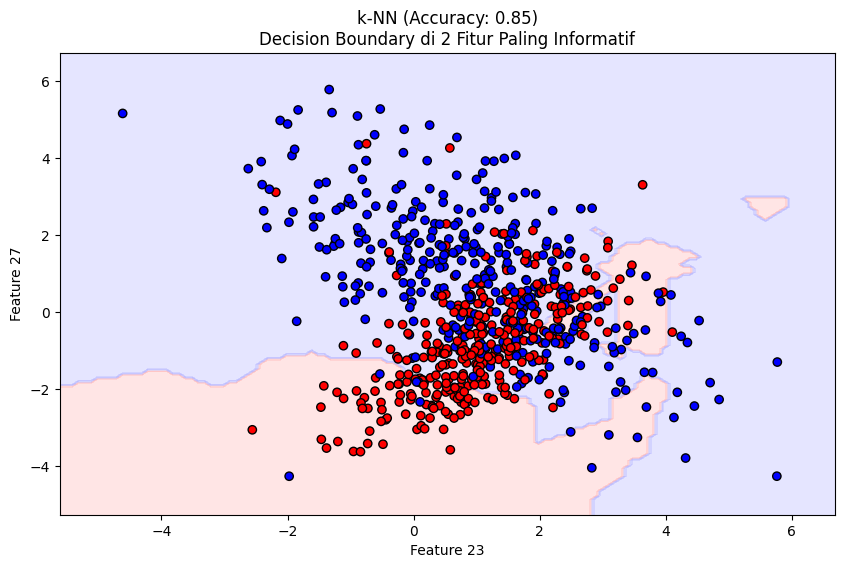

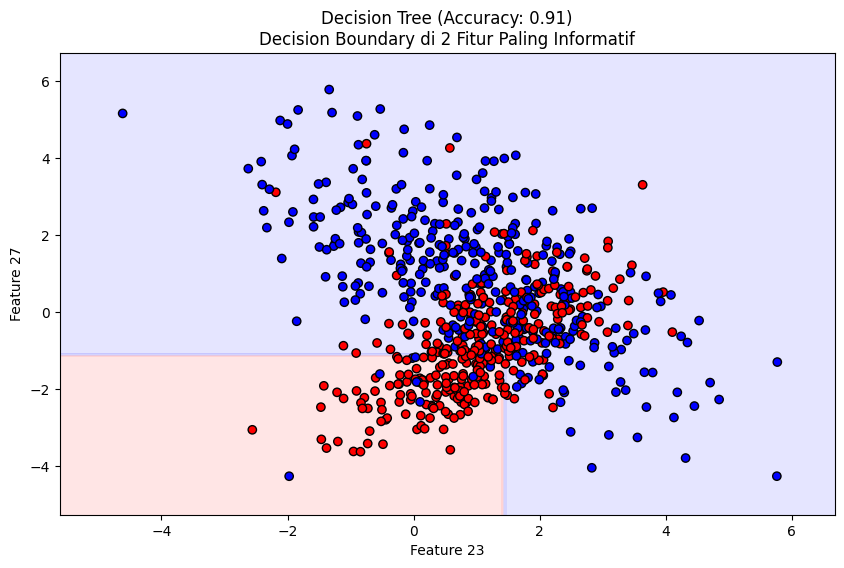

In [ ]:
# Train model (gunakan semua fitur)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Evaluasi
knn_acc = accuracy_score(y_test, knn.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))

print(f"k-NN Accuracy: {knn_acc:.2f}")
print(f"Decision Tree Accuracy: {dt_acc:.2f}")

# Plot decision boundary di 2 fitur terpilih
plot_2d_decision_boundary(knn, X_train, y_train, top2_features,
                         f"k-NN (Accuracy: {knn_acc:.2f})")
plot_2d_decision_boundary(dt, X_train, y_train, top2_features,
                         f"Decision Tree (Accuracy: {dt_acc:.2f})")

In [ ]:
feature_scenarios = [10, 150]
for n_features in feature_scenarios:
    X, y = make_classification(n_samples=1000, n_features=n_features, n_informative=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    dt = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)

    knn_acc = accuracy_score(y_test, knn.predict(X_test))
    dt_acc = accuracy_score(y_test, dt.predict(X_test))

    print(f"\n{n_features} Features (2 Informative):")
    print(f"k-NN Accuracy: {knn_acc:.2f}")
    print(f"Decision Tree Accuracy: {dt_acc:.2f}")


10 Features (2 Informative):
k-NN Accuracy: 0.83
Decision Tree Accuracy: 0.89

150 Features (2 Informative):
k-NN Accuracy: 0.66
Decision Tree Accuracy: 0.86



10 Features (2 Informative):
k-NN Accuracy: 0.89
Decision Tree Accuracy: 0.90

150 Features (2 Informative):
k-NN Accuracy: 0.72
Decision Tree Accuracy: 0.90


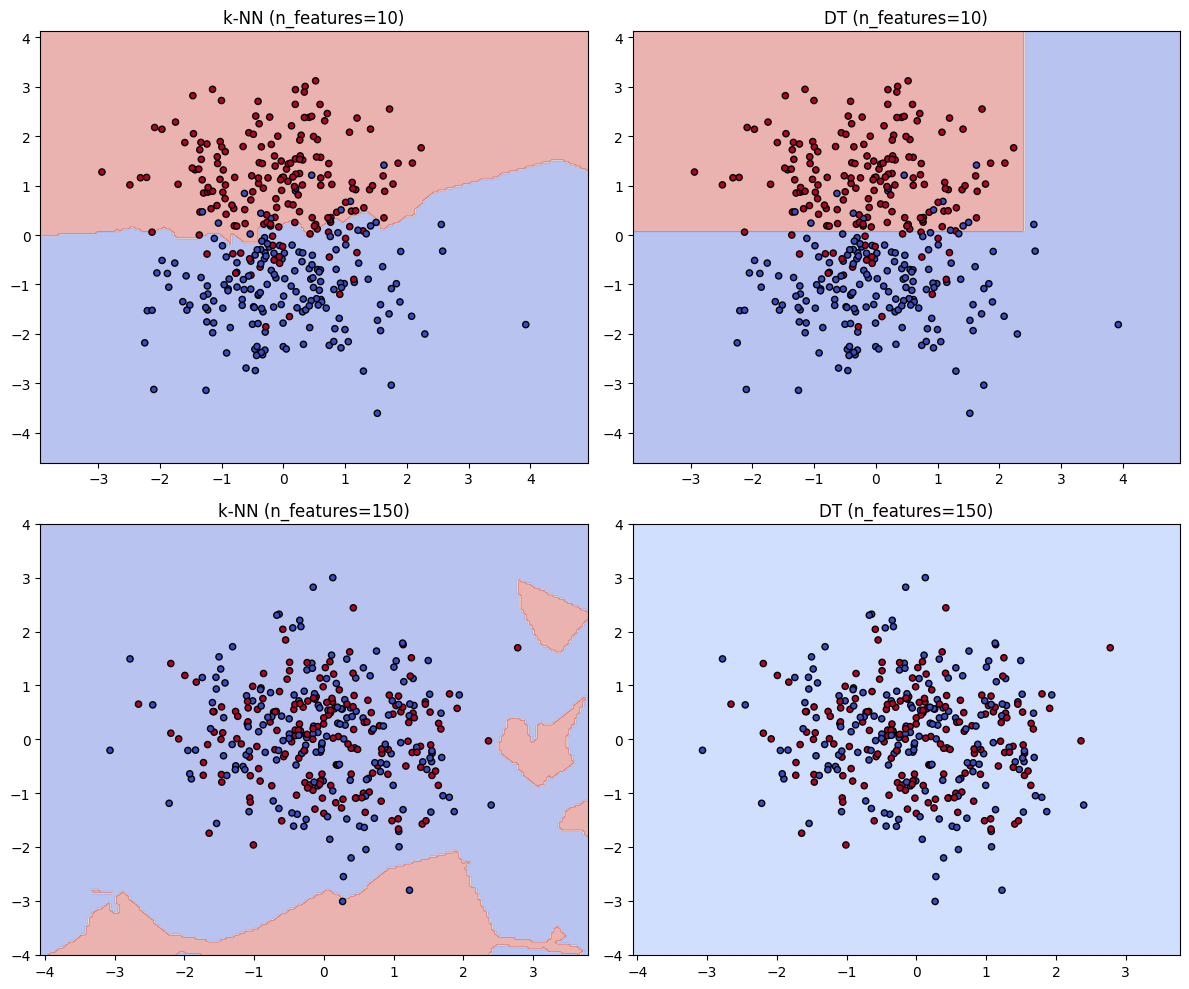

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def plot_decision_boundary(ax, model, X_train, y_train, n_features, title):
    # Kita ambil dua fitur pertama buat visualisasi
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Buat grid untuk dua fitur yang kita visualisasi
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Kalo n_features > 2, sisain fitur lain dengan nilai rata-rata dari X_train
    if n_features > 2:
        means = np.mean(X_train, axis=0)[2:]
        n_points = grid_points.shape[0]
        extra_features = np.tile(means, (n_points, 1))
        grid_points = np.hstack((grid_points, extra_features))

    # Prediksi label buat tiap titik grid
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot kontur decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)

# Buat figure 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
scenarios = [10, 150]

for i, n_features in enumerate(scenarios):
    # Bikin dataset
    X, y = make_classification(n_samples=500, n_features=n_features, n_informative=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Training k-NN dan Decision Tree
    knn = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)
    dt = DecisionTreeClassifier(max_depth=15, random_state=42).fit(X_train, y_train)

    # Plot decision boundary buat masing-masing classifier
    plot_decision_boundary(axs[i, 0], knn, X_train, y_train, n_features, f'k-NN (n_features={n_features})')
    plot_decision_boundary(axs[i, 1], dt, X_train, y_train, n_features, f'DT (n_features={n_features})')

    # Print akurasi buat referensi
    knn_acc = accuracy_score(y_test, knn.predict(X_test))
    dt_acc = accuracy_score(y_test, dt.predict(X_test))
    print(f"\n{n_features} Features (2 Informative):")
    print(f"k-NN Accuracy: {knn_acc:.2f}")
    print(f"Decision Tree Accuracy: {dt_acc:.2f}")

plt.tight_layout()
plt.show()